# Compile the main simulator code using cython 

In [1]:
!python setup.py build_ext --inplace

running build_ext
running build_ext


# Import all the relevant files 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import importlib
import seaborn as sns

In [3]:
#Importing scripts:

#Import relevant frames:
import cbgt as cbgt
import pipeline_creation as pl_creat

#Import plotting functions:
import plotting_functions as plt_func
import plotting_helper_functions as plt_help
import postprocessing_helpers as post_help

importlib.reload(plt_help)
importlib.reload(plt_func)
importlib.reload(post_help)

2023-08-23 19:25:46,757	INFO worker.py:1352 -- Connecting to existing Ray cluster at address: 127.0.0.1:6379...
2023-08-23 19:25:46,763	INFO worker.py:1529 -- Connected to Ray cluster. View the dashboard at http://127.0.0.1:8265 


<module 'postprocessing_helpers' from '/Users/cristina/Desktop/CBGTPy_release/CBGTPy/postprocessing_helpers.py'>

# Choose the experiment and create the main pipeline

In [4]:
#Choose the experiment
experiment_choice = 'stop-signal'
number_of_choices = 2

#Call choose_pipeline with the pipeline object
pl_creat.choose_pipeline(experiment_choice)

#Create the main pipeline
pl = pl_creat.create_main_pipeline(runloop=True)

#Define how many simulations to run 
#Each simulation is executed as a separate thread
num_sims = 1
num_cores = 7

#Set a seed
seed = np.random.randint(0,99999999,1)[0]
print(seed)

in choose pipeline
in reward pipeline
75434668


In [5]:
#Define the data and figure directory

data_dir = "./Data/"
figure_dir = "./Figures/"

# Running the pipeline

### Define configuration parameter

In [6]:
#See init_params.py / generateepochs.py / popconstruct.py / qvalues.py
#to know the parameters contained in each of the following variables 

configuration = {
    'experimentchoice': experiment_choice,
    'inter_trial_interval': None,
    'thalamic_threshold': 30.,
    'movement_time': ['mean', 250], #['constant', 300], #default sampled from N(250,1.5), ["constant",250], ["mean",250]
    'choice_timeout': 300, #default 1000
    
    'params': None, #neuron parameters (init_params.py)
    'pops': None,   #population parameters (init_params.py)
    'receps' : None, #receptor parameters (init_params.py)
    'base' : None, #baseline stimulation parameters (init_params.py)
    'dpmns' : None, #dopamine related parameters (init_params.py)
    'd1' : None, #D1-MSNs population related parameters (init_params.py)
    'd2' : None, #D2-MSNs population related parameters (init_params.py)
    'channels' : pd.DataFrame([['left'], ['right']], columns=['action']), #action channels related parameters (init_params.py)
    'number_of_choices':number_of_choices,
    'newpathways' : None, #connectivity parameters (popconstruct.py)
    'Q_support_params': None, #initialization of Q-values update (qvalues.py) 
    'Q_df_set': pd.DataFrame([[0.5, 0.5]],columns=["left", "right"]), #pd.DataFrame([[0.3,0.7]],columns=['left','right']), #initialized Q-values df (qvalues.py)  
    'n_trials': 1, #number of trials (generateepochs.py)
    'volatility': [None,"exact"], #frequency of changepoints (generateepochs.py)
    'conflict': (1.0, 0), #probability of the preferred choice (generateepochs.py)
    'reward_mu': 1, #mean for the magnitude of the reward (generateepochs.py)
    'reward_std': 0.1, #std for the magnitude of the reward (generateepochs.py)
    'maxstim': 0.8, # amplitude of the cortical input over base line #0.85
    'sustainedfraction': 0.75,
    
    #Stop 1
    'stop_signal_present': [True,True],
    'stop_signal_probability': [1., 1.],  #[[1,3],[1,2]], #probability of trials that will get the stop signal / list of trial numbers
    'stop_signal_amplitude': [0.6, 0.6], # amplitude of the stop signal over base line
    'stop_signal_onset': [30.,60.], #in ms #antes 200
    'stop_signal_duration' : [170.,170.], 
    'stop_signal_channel': ["all","all"], #"all" (all channels are given the stop signal) 
                                #/"any" (channel given the stop signal is chosen randomly)
                                # [list of channels] == subset of channels given the stop signa
    'stop_signal_population':["STN","GPeA"],
    
    'record_variables':["stop_input"],
    
    
    #Opto
    'opt_signal_present': [False],
    'opt_signal_probability': [1.], #[0,1,2,3,4], # probability of trials that will get the optogenetic signal / list of trial numbers
    'opt_signal_amplitude': [.7], # ampitude of the stop signal over base line
    'opt_signal_onset': [30.], # in ms
    'opt_signal_duration': [150.],
    'opt_signal_channel': ["all"], # "all" (all channels are given the stop signal) 
    'opt_signal_population':["iSPN"],
}

### Run the simulation

In [7]:
results = cbgt.ExecutionManager(cores=7).run([pl]*num_sims,[configuration]*num_sims)  

(worker pid=28752) in choose pipeline
(worker pid=28752) in choose pipeline
SpawnThreadManagers <backend.Pipeline object at 0x7fedf91de6d0>
(worker pid=28752) conflict (1.0, 0)
(worker pid=28752) conflict (1.0, 0)
(worker pid=28752) sum 1.0
(worker pid=28752) n_prob_trials [1, 0]
(worker pid=28752) calc_rew        left  right
(worker pid=28752) 0  1.097874    0.0
(worker pid=28752) reward_list        left  right
(worker pid=28752) 0  1.097874    0.0
(worker pid=28752) conflict (1.0, 0)
(worker pid=28752) conflict (1.0, 0)
(worker pid=28752) sum 1.0
(worker pid=28752) n_prob_trials [1, 0]
(worker pid=28752) calc_rew        left  right
(worker pid=28752) 0  1.097874    0.0
(worker pid=28752) reward_list        left  right
(worker pid=28752) 0  1.097874    0.0
SpawnThreadManagers <backend.Pipeline object at 0x7fedd80d9490>
(worker pid=28752) scaling_conn 1.0
(worker pid=28752) scaling_wts 1
(worker pid=28752) begin GenOptSchedule
(worker pid=28752) scaling_conn 1.0
(worker pid=28752) scal

(worker pid=28752) /Users/cristina/Desktop/CBGTPy_release/CBGTPy/qvalues.py:105: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=28752)   Q_df = Q_df.append(
(worker pid=28752) /Users/cristina/Desktop/CBGTPy_release/CBGTPy/qvalues.py:121: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=28752)   Q_df = Q_df.append(
(worker pid=28752) /Users/cristina/Desktop/CBGTPy_release/CBGTPy/qvalues.py:105: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=28752)   Q_df = Q_df.append(
(worker pid=28752) /Users/cristina/Desktop/CBGTPy_release/CBGTPy/qvalues.py:121: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=28752)   

(worker pid=28752) agent.stop_popids [array([2, 3]), array([6, 7])]
(worker pid=28752) agent.stop_popids [array([2, 3]), array([6, 7])]
(worker pid=28752) stop stim started
(worker pid=28752) stop stim started
(worker pid=28752) stop stim started
(worker pid=28752) stop stim started
(worker pid=28752) gateFRs [19.11111111 16.66666667]
(worker pid=28752) thresholds_crossed []
(worker pid=28752) gateFRs [19.11111111 16.66666667]
(worker pid=28752) thresholds_crossed []
(worker pid=28752) trial_num 0
(worker pid=28752)   action
(worker pid=28752) 0   left
(worker pid=28752) 1  right
(worker pid=28752) chosen_action: stop
(worker pid=28752) trial_num 0
(worker pid=28752)   action
(worker pid=28752) 0   left
(worker pid=28752) 1  right
(worker pid=28752) chosen_action: stop


### Results

In [ ]:
#List all the agent variables accessible
results[0].keys()

In [ ]:
results[0]['stop_list_trials_list']

In [ ]:
results[0]['meaneff_GABA']

In [ ]:
results[0]['stop_signal_amplitude']

In [ ]:
experiment_choice

In [ ]:
#Extract all the relevant dataframes
firing_rates, rt_dist = plt_help.extract_relevant_frames(results,seed,experiment_choice)

In [ ]:
results[0]['popfreqs']

In [ ]:
#Firing rates  
firing_rates[0]

In [ ]:
recorded_variables = post_help.extract_recording_variables(results,results[0]['record_variables'],seed)

In [ ]:
recorded_variables['stop_input']#.melt(id_vars='Time(ms)')

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(5,4))
sns.set(style="white", font_scale=1.5)
sns.lineplot(x="Time(ms)",y="value",data=recorded_variables['stop_input'],hue='nuclei',lw=3.0,ax=ax)
# ax.set_ylabel("STN",fontweight='bold')
# ax.legend_.remove()
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)
plt.tight_layout()
fig.savefig(figure_dir+'stop_input.png')

In [ ]:
#Extract the data tables from the agent
datatables = cbgt.collateVariable(results,'datatables')
datatables[0]

In [ ]:
#Save the selected variables of results in the data_dir specified
cbgt.saveResults(results,data_dir+'network_data_'+str(seed)+'.pickle',['popfreqs','popdata','datatables'])

In [ ]:
results[0].keys()

In [ ]:
results[0]['stop_signal_present']

In [ ]:
# Plot the firing rates extracted, figure handles are returned in fig_handles
FR_fig_handles = plt_func.plot_fr(firing_rates,datatables,results,experiment_choice,True)
# ax = FR_fig_handles[0].axes[4]
# for x in datatables[0].stimulusstarttime:
#     ylim = ax.get_ylim()
#     ax.vlines(x=x+results[0]['stop_2_signal_onset'],ymin=ylim[0],ymax=ylim[1],ls='dashed',color='k',lw=2.0)
# ax.set_xlim(1000,1500)
# ax = FR_fig_handles[0].axes[7]
# for x in datatables[0].stimulusstarttime:
#     ylim = ax.get_ylim()
#     ax.vlines(x=x+results[0]['stop_signal_onset'],ymin=ylim[0],ymax=ylim[1],ls='dashed',color='k',lw=2.0)
# ax.set_xlim(1000,1500)
FR_fig_handles[0].savefig(figure_dir+"Example_FR_stopsignal.png",dpi=300)

In [ ]:
# FR_fig_handles = plt_func.plot_fr_flex(firing_rates,datatables,['left'],['all'],(1500,2000))
# ax = FR_fig_handles.axes[0]
# for x in datatables[0].stimulusstarttime:
#     ylim = ax.get_ylim()
#     ax.vlines(x=x+results[0]['stop_signal_onset'],ymin=ylim[0],ymax=ylim[1],ls='dashed',color='k',lw=2.0)

# ax = FR_fig_handles[0].axes[1]
# for x in datatables[0].stimulusstarttime:
#     ylim = ax.get_ylim()
#     ax.vlines(x=x+results[0]['stop_signal_onset'],ymin=ylim[0],ymax=ylim[1],ls='dashed',color='k',lw=2.0)


In [ ]:
FR_fig_handles

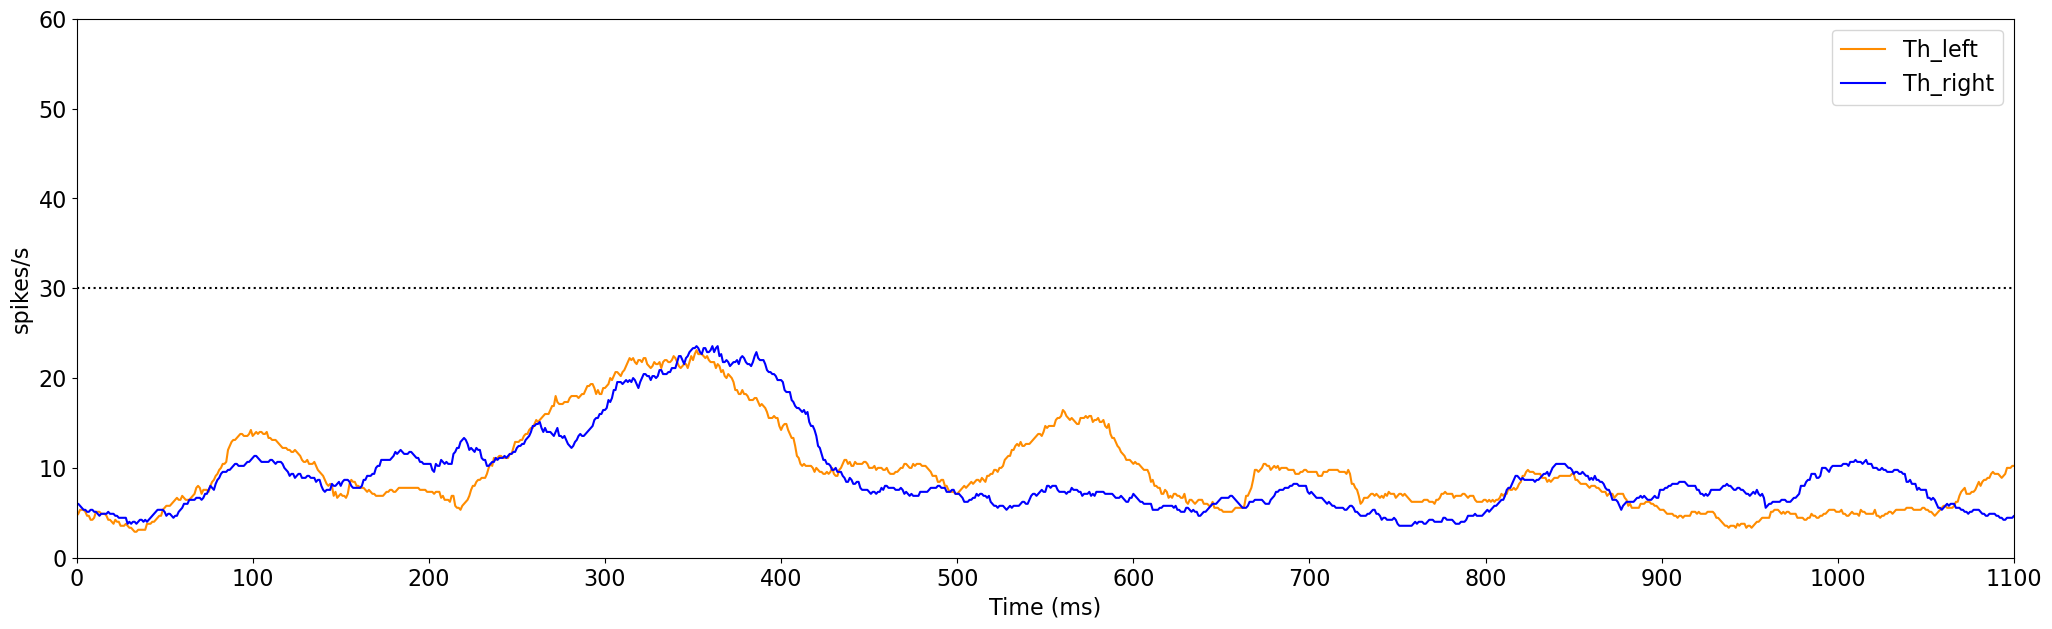

In [14]:
#Th activity
f, (ax1) = plt.subplots(1, 1, figsize=(25, 7), sharex=True)
plt_help.rename_columns(results[0])
results[0]['popfreqs'].plot(x='Time (ms)', y='Th_left', c ='darkorange', ax = ax1)
results[0]['popfreqs'].plot(x='Time (ms)', y='Th_right', c ='b', ax = ax1)
plt.xticks(np.arange(0, 1200, 100))
#if results[0]['stop_signal_present'] == True:
    #ax2.hlines(y=35, xmin=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[0][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[0][0]+results[0]['stop_signal_duration'], colors='r', linewidth = 6)
#if results[0]['stop_signal_present_2'] == True:
    #ax2.hlines(y=36.5, xmin=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df_2'].iloc[0][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df_2'].iloc[0][0]+results[0]['stop_signal_duration_2'], colors='y', linewidth = 6)

ax1.axhline(y=30, c='k', linestyle='dotted', color='silver')
ax1.legend(['Th_left', 'Th_right'], loc = 'best', fontsize=16.)
#ax1.legend(['Th'], loc = 'best')
ax1.set_xlim(0, 1100)
ax1.set_ylim(0, 60)
ax1.set_ylabel('spikes/s', fontsize=16)
ax1.set_xlabel('Time (ms)', fontsize=16)

for x in ax1.get_xticklabels():
    x.set_fontsize(16.)
for x in ax1.get_yticklabels():
    x.set_fontsize(16.)

    
plt.savefig('./Figures/FRs_Th_stop'+str(seed)+'.png', dpi=400)